# 基本的数据分布

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 文件

jounerydb_csv ="/home/pci/dong/AIGC-image/jouneryDB/all_cleaned.csv"
mj_csv = "/home/pci/dong/AIGC-image/MJ/all_cleaned.csv"


In [3]:
# 读取数据
jounerydb = pd.read_csv(jounerydb_csv)
mj = pd.read_csv(mj_csv)

/tmp/ipykernel_497864/1631734562.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jounerydb_filtered['Emotion_Categorical'] = pd.Categorical(


JouneryDB 情绪分布：
Emotion_Categorical
Amusement       25645
Anger            4229
Awe            268661
Contentment     75935
Disgust          3048
Excitement      41613
Fear            30281
Sad             11382
Name: count, dtype: int64

MJ 情绪分布：
Emotion_Categorical
Amusement       601
Anger            81
Awe            6438
Contentment    3765
Disgust          57
Excitement     1177
Fear            650
Sad             334
Name: count, dtype: int64


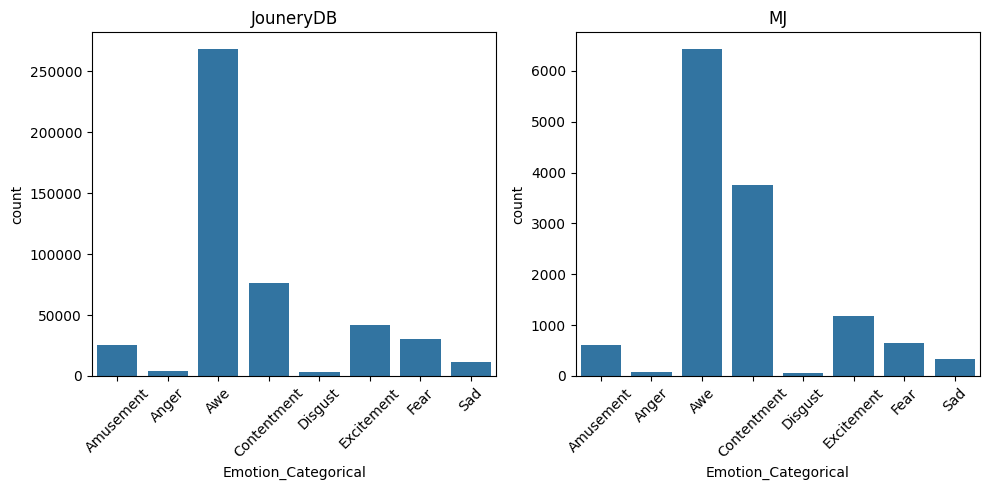

In [4]:
# the emotion distribution of the two datasets
emotion_cat = ["Amusement", "Anger", "Awe", "Contentment", "Disgust", "Excitement", "Fear", "Sad"]

# 确保只保留 emotion_cat 中的类别
jounerydb_filtered = jounerydb[jounerydb['Emotion_Categorical'].isin(emotion_cat)]
mj_filtered = mj[mj['Emotion_Categorical'].isin(emotion_cat)]

# 设置类别顺序
jounerydb_filtered['Emotion_Categorical'] = pd.Categorical(
    jounerydb_filtered['Emotion_Categorical'], categories=emotion_cat, ordered=True
)
mj_filtered['Emotion_Categorical'] = pd.Categorical(
    mj_filtered['Emotion_Categorical'], categories=emotion_cat, ordered=True
)

jounerydb_counts = jounerydb_filtered['Emotion_Categorical'].value_counts(sort=False)
mj_counts = mj_filtered['Emotion_Categorical'].value_counts(sort=False)

# 打印具体的数字
print("JouneryDB 情绪分布：")
print(jounerydb_counts)

print("\nMJ 情绪分布：")
print(mj_counts)

# 绘制图表
plt.figure(figsize=(10, 5))

# JouneryDB 图表
plt.subplot(1, 2, 1)
sns.countplot(data=jounerydb_filtered, x='Emotion_Categorical', order=emotion_cat)
plt.title('JouneryDB')
plt.xticks(rotation=45)  # 可选：旋转标签以防重叠

# MJ 图表
plt.subplot(1, 2, 2)
sns.countplot(data=mj_filtered, x='Emotion_Categorical', order=emotion_cat)
plt.title('MJ')
plt.xticks(rotation=45)  # 可选：旋转标签以防重叠

plt.tight_layout()
plt.show()
